In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_NG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,NaN,0.5,NaN,0.48,0.22
1,NaN,NaN,0.48,0.27,0.5,0.0,0.53,NaN
2,0.64,NaN,0.49,0.15,0.5,0.0,0.53,NaN
3,0.58,0.44,NaN,0.13,0.5,0.0,NaN,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,NaN,NaN,0.47,0.18,0.5,NaN,0.50,0.22
1480,0.35,NaN,0.46,0.14,0.5,0.0,0.54,0.66
1481,NaN,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,NaN,0.0,NaN,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	371
float64		column 2	296
float64		column 3	223
float64		column 4	223
float64		column 5	222
float64		column 6	222
float64		column 7	445
float64		column 8	370


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1113.000000,1188.000000,1261.000000,1261.000000,1262.000000,1262.000000,1039.000000,1114.000000
mean,0.499093,0.499478,0.500174,0.261975,0.505151,0.007108,0.502916,0.274147
std,0.128525,0.119772,0.083583,0.135236,0.050505,0.073899,0.047369,0.098903
min,0.170000,0.130000,0.210000,0.000000,0.500000,0.000000,0.130000,0.010000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.485000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.560000,0.570000,0.550000,0.310000,0.500000,0.000000,0.530000,0.290000
max,0.970000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,0.990000


<AxesSubplot:>

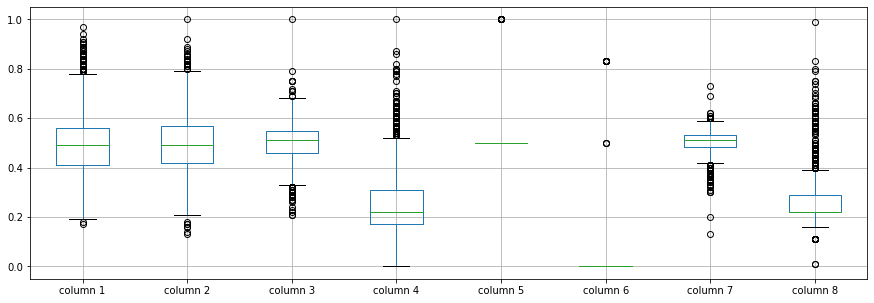

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.499093
column 2    0.499478
column 3    0.500174
column 4    0.261975
column 5    0.505151
column 6    0.007108
column 7    0.502916
column 8    0.274147
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.545056,-0.072019,0.172734,0.078010,0.003218,0.032421,-0.090749
column 2,0.545056,1.000000,-0.250256,0.114682,0.073106,0.028877,0.107797,-0.063812
column 3,-0.072019,-0.250256,1.000000,0.061079,-0.027208,0.010991,-0.169928,-0.004285
column 4,0.172734,0.114682,0.061079,1.000000,0.008067,-0.017587,-0.091270,-0.033711
column 5,0.078010,0.073106,-0.027208,0.008067,1.000000,-0.009339,0.052574,0.006837
column 6,0.003218,0.028877,0.010991,-0.017587,-0.009339,1.000000,0.011398,-0.032380
column 7,0.032421,0.107797,-0.169928,-0.091270,0.052574,0.011398,1.000000,0.092837
column 8,-0.090749,-0.063812,-0.004285,-0.033711,0.006837,-0.032380,0.092837,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+25,8+25+25,8+25+25+25,8+25+25+25+25,8+25+25+25+25+25,8+25+25+25+25+25+25,8+25+25+25+25+25,8+25+25+25+25,8+25+25+25,8+25+25,8+25,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.3954633241114407
Epoch: 1 , loss: 2.034677327974983
Epoch: 2 , loss: 1.8590816207554028
Epoch: 3 , loss: 1.7389784701492474
Epoch: 4 , loss: 1.6135032254716624
Epoch: 5 , loss: 1.5378074192482492
Epoch: 6 , loss: 1.468982309103012
Epoch: 7 , loss: 1.3922147362128547
Epoch: 8 , loss: 1.3324896369291388
Epoch: 9 , loss: 1.2887693604697352
Epoch: 10 , loss: 1.243784349249757
Epoch: 11 , loss: 1.2014335478129594
Epoch: 12 , loss: 1.1794687658548355
Epoch: 13 , loss: 1.1243730822335118
Epoch: 14 , loss: 1.1140465898358303
Epoch: 15 , loss: 1.0932699966689814
Epoch: 16 , loss: 1.050978312673776
Epoch: 17 , loss: 1.0431946658569833
Epoch: 18 , loss: 1.0370078358961188
Epoch: 19 , loss: 1.0100263279417288
Epoch: 20 , loss: 0.9903775667366774
Epoch: 21 , loss: 0.9734377951725669
Epoch: 22 , loss: 0.9757807585208312
Epoch: 23 , loss: 0.9552929446749066
Epoch: 24 , loss: 0.9476274251937866
Epoch: 25 , loss: 0.92

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.430000
column 2    0.440000
column 3    0.480000
column 4    0.220000
column 5    0.449089
column 6    0.000000
column 7    0.510000
column 8    0.248666
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,0.000000,0.000000,0.100803,0.000000,0.000325,0.000000,0.000000
1,0.128171,-0.107942,0.000000,0.000000,0.000000,0.000000,0.000000,0.072879
2,0.000000,-0.360865,0.000000,0.000000,0.000000,0.000000,0.000000,-0.051279
3,0.000000,0.000000,-0.059092,0.000000,0.000000,0.000000,-0.023560,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1479,-0.432950,-0.241534,0.000000,0.000000,0.000000,0.000275,0.000000,0.000000
1480,0.000000,0.178276,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1481,-0.127212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1482,0.000000,0.000000,0.000000,0.000000,0.087038,0.000000,-0.000103,0.094986


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(7.84637472880911, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.16728532072288177

In [18]:
new_df.iloc[66,:]

column 1    0.46
column 2    0.49
column 3    0.58
column 4    0.23
column 5    0.50
column 6    0.00
column 7    0.44
column 8    0.22
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.580000,0.610000,0.470000,0.230803,0.500000,0.000325,0.480000,0.220000
1,0.558171,0.562058,0.480000,0.270000,0.500000,0.000000,0.530000,0.292879
2,0.640000,0.259135,0.490000,0.150000,0.500000,0.000000,0.530000,0.168721
3,0.580000,0.440000,0.510908,0.130000,0.500000,0.000000,0.516440,0.220000
4,0.420000,0.440000,0.480000,0.540000,0.500000,0.000000,0.480000,0.220000
...,...,...,...,...,...,...,...,...
1479,0.387050,0.388466,0.470000,0.180000,0.500000,0.000275,0.500000,0.220000
1480,0.350000,0.468276,0.460000,0.140000,0.500000,0.000000,0.540000,0.660000
1481,0.282788,0.470000,0.500000,0.140000,0.500000,0.000000,0.530000,0.370000
1482,0.510000,0.450000,0.620000,0.250000,0.587038,0.000000,0.589897,0.314986


In [20]:
imputations[-1].to_excel("Yeast_NG_20(imp).xlsx", index=False, header=False)